In [ ]:
# Manipulacion de imágenes con NUmy y sciPy
print('Hola')
a = [2,3,4,71,7]
a.sort()
print(a)

In [ ]:
import imageio
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
im = imageio.imread('image.png')

def rotateImage(im, angle):
    arr = ndimage.rotate(im,angle)
    return arr

# transformar a escala de grises
def toGrayScale(rgb):
    return np.dot(rgb[...,:3],[0.1,0.4,0.1])
imGray = toGrayScale(im)

def splitLayers():
    fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
    for c, ax in zip(range(3), ax):
        # create zero matrix
        split_img = np.zeros(im.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
        # assing each channel 
        split_img[ :, :, c] = im[ :, :, c]
        # display each channel
        ax.imshow(split_img)
#        plt--imshow(split_img)
 #       plt.show()

plt.imshow(imGray, cmap=plt.get_cmap('gray'))
plt.show()

plt.imshow(rotateImage(im,45))
plt.show()



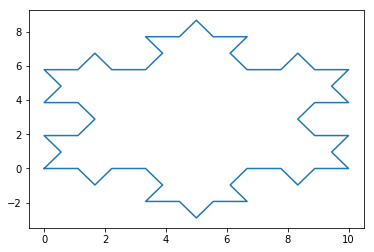

In [154]:
import numpy as np
import matplotlib.pyplot as plt

def getp(p1,p2):
    z=complex(p2[0]-p1[0],p2[1]-p1[1])
    zr=complex(1/2,-3**(1/2)/2)
    z=z*zr
    p=[z.real+p1[0],z.imag+p1[1]]
    return p

def obtener_posiciones(iteracion):
    ir=10
    pos_ini1=[0,0]
    pos_ini2=[ir,0]
    pos_ini3=[ir/2,ir/2*(3**(1/2))]
    if iteracion==0:
        return [pos_ini1,pos_ini2,pos_ini3]
    else:
        points=obtener_posiciones(iteracion-1)
        points.append(pos_ini1)
        i=0 
        ls=[]
        while(1):
            p1=points[i]
            p2=points[i+1]
            p11=[p1[0]+(p2[0]-p1[0])/3,p1[1]+(p2[1]-p1[1])/3]
            p12=[p1[0]+(p2[0]-p1[0])/3*2,p1[1]+(p2[1]-p1[1])/3*2]
            p=getp(p11,p12)
            ls.append(p1)
            ls.append(p11)
            ls.append(p)
            ls.append(p12)
            i=i+1
            if len(points)-1<i+1:
                break
        return ls

def generarCopo(iteracion):
    ps = obtener_posiciones(iteracion)
    lineas_izq = []
    lineas_alt = []
    for p in ps: 
        lineas_izq.append(p[0])
        lineas_alt.append(p[1])
        
    lineas_izq.append(ps[0][0])
    lineas_alt.append(ps[0][1])
    left = np.array(lineas_izq)
    height = np.array(lineas_alt)
    
    plt.plot(left, height)
    plt.show()
    
generarCopo(2)

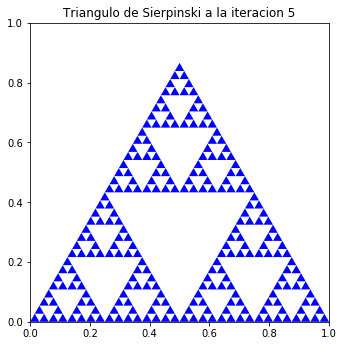

In [131]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def trazar_triangulo(Posicion):
    m = Posicion * 0.5
    n = Posicion * 0.5 + np.array([0.5, 0])
    k = Posicion * 0.5 + np.array([0.25, np.sqrt(3)/4])
    return np.array([m,n,k])

def generarSierpinski(iteracion):
    # triangulo unitario inicial
    triangle = np.array([[0, 0],
                  [1, 0],
                  [0.5, np.sqrt(3)/2]])
    # Crea un array que representa el triangulo Sierpinski hasta la iteracion deseada
    for e in range(iteracion):
        triangle = trazar_triangulo(triangle)
    # Se procede a graficar el triangulo
    fig1 = plt.figure(figsize=(10,5.5))
    ax1 = fig1.add_subplot(111, aspect='equal')
    for t in triangle.reshape(3**iteracion,3,2):
        ax1.add_patch(mpatches.Polygon(t, fc="b"))
    plt.title(f'Triangulo de Sierpinski a la iteracion {iteracion}')
    plt.show()
    
generarSierpinski(5)

C:\Users\LeAdm\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
C:\Users\LeAdm\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in square
  app.launch_new_instance()
C:\Users\LeAdm\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


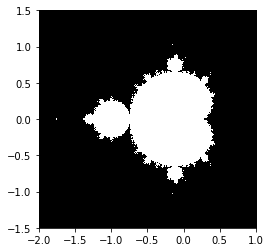

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.show()

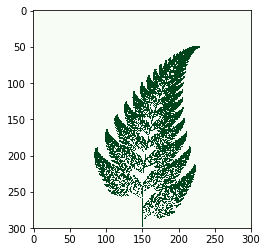

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

f1 = lambda x,y: (0., 0.16*y)
f2 = lambda x,y: (0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6)
f3 = lambda x,y: (0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6)
f4 = lambda x,y: (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)
fs = [f1, f2, f3, f4]

npts = 50000
# Canvas size (pixels)
width, height = 300, 300
aimg = np.zeros((width, height))

x, y = 0, 0
for i in range(npts):
    # Pick a random transformation and apply it
    f = np.random.choice(fs, p=[0.01, 0.85, 0.07, 0.07])
    x, y = f(x,y)
    # Map (x,y) to pixel coordinates.
    # NB we "know" that -2.2 < x < 2.7 and 0 <= y < 10

    ix, iy = int(width / 2 + x * width / 10), int(y * height / 12)
    # Set this point of the array to 1 to mark a point in the fern
    aimg[iy, ix] = 1

plt.imshow(aimg[::-1,:], cmap=cm.Greens)
plt.show()

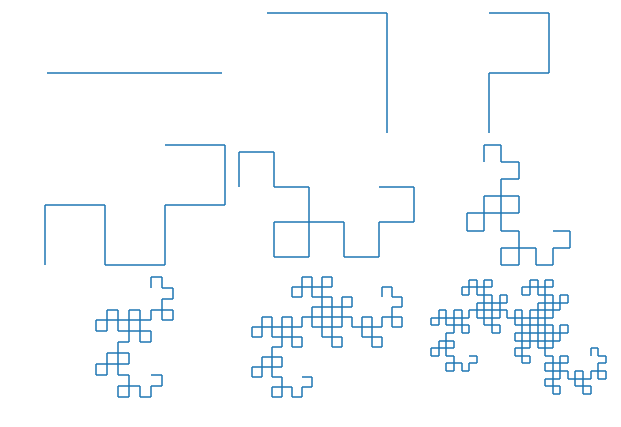

In [110]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import collections

class L_System(object):
    def __init__(self, rule):
        info = rule['S']
        for i in range(rule['iter']):
            ninfo = []
            for c in info:
                if c in rule:
                    ninfo.append(rule[c])
                else:
                    ninfo.append(c)
            info = "".join(ninfo)
        self.rule = rule
        self.info = info

    def get_lines(self):
        d = self.rule['direct']
        a = self.rule['angle']
        p = (0.0, 0.0)
        l = 1.0
        lines = []
        stack = []
        for c in self.info:
            if c in "Ff":
                r = d * np.pi / 180
                t = p[0] + l*np.cos(r), p[1] + l*np.sin(r)
                lines.append(((p[0], p[1]), (t[0], t[1])))
                p = t
            elif c == "+":
                d += a
            elif c == "-":
                d -= a
            elif c == "[":
                stack.append((p,d))
            elif c == "]":
                p, d = stack[-1]
                del stack[-1]
        return lines

rules = [
    {
        "F":"F+F--F+F", "S":"F",
        "direct":180,
        "angle":60,
        "iter":5,
        "title":"Koch"
    },
    {
        "X":"X+YF+", "Y":"-FX-Y", "S":"FX",
        "direct":0,
        "angle":90,
        "iter":13,
        "title":"Dragon"
    },
    {
        "f":"F-f-F", "F":"f+F+f", "S":"f",
        "direct":0,
        "angle":60,
        "iter":6,
        "title":"Triangle"
    },
    {
        "X":"F-[[X]+X]+F[+FX]-X", "F":"FF", "S":"X",
        "direct":-45,
        "angle":25,
        "iter":6,
        "title":"Plant"
    },
    {
        "S":"X", "X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+",
        "direct":0,
        "angle":90,
        "iter":2,
        "title":"Hilbert"
    },
    {
        "S":"L--F--L--F", "L":"+R-F-R+", "R":"-L+F+L-",
        "direct":0,
        "angle":45,
        "iter":10,
        "title":"Sierpinski"
    },
    
]

def draw(rule, iter=None):
    fig1 = pl.figure(figsize=(8,5.5))
    for i in range(iter):
        if iter!=None:
            rule["iter"] = i
        lines = L_System(rule).get_lines()
        linecollections = collections.LineCollection(lines)
        ax1 = fig1.add_subplot(331+i)
        ax1.add_collection(linecollections, autolim=True)
        ax1.axis("equal")
        ax1.set_axis_off()
        #ax.set_xlim(ax.dataLim.xmin, ax.dataLim.xmax)
        ax1.invert_yaxis()
    fig1.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)
    pl.show()
    
draw(rules[1],9)

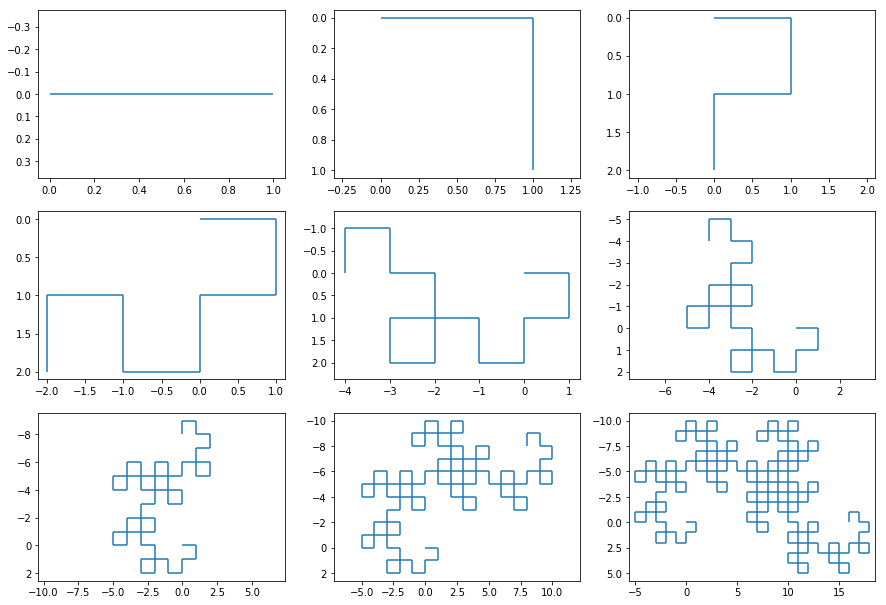

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections

class Fractal(object):
    def __init__(self, regla):
        info = regla['S']
        for i in range(regla['iter']):
            ninfo = []
            for c in info:
                if c in regla:
                    ninfo.append(regla[c])
                else:
                    ninfo.append(c)
            info = "".join(ninfo)

        self.regla = regla
        self.info = info

    def get_lineas(self):
        direcc = self.regla['direccion']
        ang_giro = self.regla['angulo']
        pos_inicial = (0.0, 0.0)
        long_linea = 1.0
        lineas = []
        pila = []
        for c in self.info:
            if c in "Ff":
                a_rad = direcc * np.pi / 180
                pos_destino = pos_inicial[0] + long_linea*np.cos(a_rad), pos_inicial[1] + long_linea*np.sin(a_rad)
                lineas.append(((pos_inicial[0], pos_inicial[1]), (pos_destino[0], pos_destino[1])))
                pos_inicial = pos_destino
            elif c == "+":
                direcc += ang_giro
            elif c == "-":
                direcc -= ang_giro
            elif c == "[":
                pila.append((pos_inicial,direcc))
            elif c == "]":
                pos_inicial, direcc = pila[-1]
                del pila[-1]
        return lineas

reglas = [
    {
        "F":"F+F--F+F", "S":"F",
        "direccion":180,
        "angulo":60,
        "iter":1,
        "fractal":"Koch"
    },
    {
        "X":"X+YF+", "Y":"-FX-Y", "S":"FX",
        "direccion":0,
        "angulo":90,
        "iter":1,
        "fractal":"Dragon"
    },
    {
        "f":"F-f-F", "F":"f+F+f", "S":"f",
        "direccion":0,
        "angulo":60,
        "iter":1,
        "fractal":"Triangle"
    },
    {
        "X":"F-[[X]+X]+F[+FX]-X", "F":"FF", "S":"X",
        "direccion":-45,
        "angulo":25,
        "iter":1,
        "fractal":"Plant"
    },
    {
        "S":"X", "X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+",
        "direccion":0,
        "angulo":90,
        "iter":1,
        "fractal":"Hilbert"
    },
    {
        "S":"L--F--L--F", "L":"+R-F-R+", "R":"-L+F+L-",
        "direccion":0,
        "angulo":45,
        "iter":1,
        "fractal":"Sierpinski"
    },
]

def dibujarFractal(regla, iteraciones=None):
    fig = plt.figure(figsize=(15,10.5))
    for i in range(iteraciones):
        if iteraciones!=None:
            regla["iter"] = i
        lineas = Fractal(regla).get_lineas()
        linecollections = collections.LineCollection(lineas)
        ax = fig.add_subplot(331+i)
        ax.add_collection(linecollections, autolim=True)
        ax.axis("equal") 
        ax.invert_yaxis()
   # plt.title('Cola del dragon')
    plt.show()

dibujarFractal(reglas[1],9)

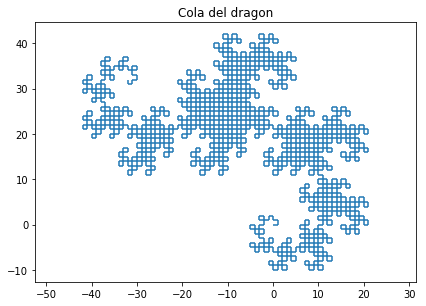

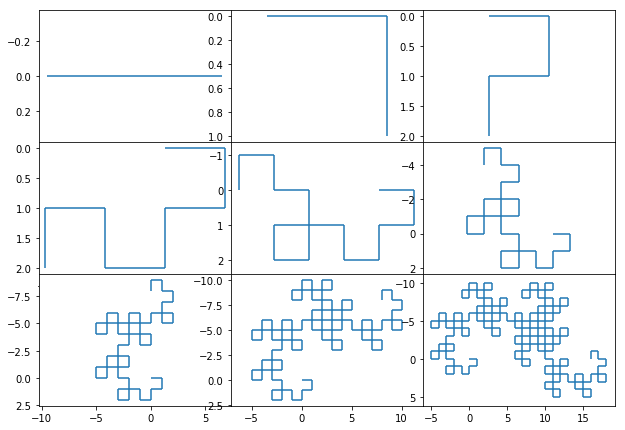

In [116]:
#from math import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections

class FractalDragon(object):
    def __init__(self, regla):
        info = regla['S']
        for i in range(regla['iter']):
            ninfo = []
            for c in info:
                if c in regla:
                    ninfo.append(regla[c])
                else:
                    ninfo.append(c)
            info = "".join(ninfo)

        self.regla = regla
        self.info = info

    def get_lineas(self):
        direcc = self.regla['direccion']
        ang_giro = self.regla['angulo']
        pos_inicial = (0.0, 0.0)
        long_linea = 1.0
        lineas = []
        pila = []
        for c in self.info:
            if c in "Ff":
                a_rad = direcc * np.pi / 180
                pos_destino = pos_inicial[0] + long_linea*np.cos(a_rad), pos_inicial[1] + long_linea*np.sin(a_rad)
                lineas.append(((pos_inicial[0], pos_inicial[1]), (pos_destino[0], pos_destino[1])))
                pos_inicial = pos_destino
            elif c == "+":
                direcc += ang_giro
            elif c == "-":
                direcc -= ang_giro
            elif c == "[":
                pila.append((pos_inicial,direcc))
            elif c == "]":
                pos_inicial, direcc = pila[-1]
                del pila[-1]
        return lineas

reglas = [
    {
        "X":"X+YF+", 
        "Y":"-FX-Y", 
        "S":"FX",
        "direccion":0,
        "angulo":90,
        "iter":1,
        "titulo":"Dragon"
    }
]

def dibujarDragon(regla, iteraciones=None):
    if iteraciones!=None:
        regla["iter"] = iteraciones
    lineas = FractalDragon(regla).get_lineas()
    fig = plt.figure(figsize=(15,10.5))
    ax = fig.add_subplot(221)
    linecollections = collections.LineCollection(lineas)
    ax.add_collection(linecollections, autolim=True)
    ax.axis("equal") 
    #ax.invert_yaxis()
    plt.title('Cola del dragon')
    plt.show()

dibujarDragon(reglas[0],11)

def draw(rule, iter=None):
    fig1 = pl.figure(figsize=(8,5.5))
    for i in range(iter):
        if iter!=None:
            rule["iter"] = i
        lines = L_System(rule).get_lines()
        linecollections = collections.LineCollection(lines)
        ax1 = fig1.add_subplot(331+i)
        ax1.add_collection(linecollections, autolim=True)
        ax1.axis("equal")
        #ax1.set_axis_off()
        #ax.set_xlim(ax.dataLim.xmin, ax.dataLim.xmax)
        ax1.invert_yaxis()
    fig1.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)
    pl.show()
    
draw(rules[1],9)